In [55]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config2 import weather_api_key

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [56]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [57]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [58]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [59]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [60]:
#  Use the tuple() function to display the latitude and longitude combination

for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

odweyne so
faanui pf
albany au
busselton au
mar del plata ar
grand river south east mu
mar del plata ar
ushuaia ar
xai-xai mz
castro cl
taolanaro mg
narsaq gl
punta arenas cl
galveston us
barentsburg sj
sept-iles ca
gillette us
airai pw
jardin co
busselton au
bredasdorp za
ancud cl
taolanaro mg
bathsheba bb
carnarvon au
hasaki jp
vostok ru
jamestown sh
yar-sale ru
port alfred za
higuey do
constitucion mx
sentyabrskiy ru
rikitea pf
padang id
loiza us
barentsburg sj
puerto ayora ec
havre-saint-pierre ca
attawapiskat ca
kaitangata nz
kodiak us
new norfolk au
butaritari ki
kirovskiy ru
vaini to
kodiak us
lubaczow pl
taolanaro mg
kodiak us
wagga wagga au
nemuro jp
kilindoni tz
saint-philippe re
manali in
halifax ca
phetchabun th
mount gambier au
arlit ne
rikitea pf
saint george bm
mataura pf
kirovskiy ru
huarmey pe
atuona pf
kalmunai lk
taolanaro mg
mataura pf
mori jp
samarinda id
wana pk
albany au
chesapeake us
mataura pf
bada ru
illoqqortoormiut gl
hithadhoo mv
cherskiy ru
hermanus za
tao

jamestown sh
viytivka ua
zalantun cn
henties bay na
longyearbyen sj
kapaa us
yulara au
haines junction ca
upernavik gl
mataura pf
rikitea pf
albany au
tasiilaq gl
mataura pf
kalmunai lk
punta arenas cl
wasilla us
ushuaia ar
tuktoyaktuk ca
ushuaia ar
saskylakh ru
ponta do sol cv
kosya ru
punta arenas cl
castro cl
port alfred za
nizhneyansk ru
port alfred za
aflu dz
yendi gh
ushuaia ar
hilo us
college us
severo-kurilsk ru
nacogdoches us
husavik is
hobart au
kapaa us
chokurdakh ru
stephenville ca
portel br
mackay au
castro cl
port alfred za
ushuaia ar
carnarvon au
jamestown sh
eyl so
chuy uy
srednekolymsk ru
mys shmidta ru
tiarei pf
castro cl
hermanus za
kawalu id
albany au
new norfolk au
umzimvubu za
mataura pf
butaritari ki
tasiilaq gl
airai pw
port macquarie au
ushuaia ar
kavaratti in
aklavik ca
tsihombe mg
vaini to
rikitea pf
hithadhoo mv
mount pleasant us
tiksi ru
bambous virieux mu
los llanos de aridane es
mys shmidta ru
ushuaia ar
qaanaaq gl
hasaki jp
rikitea pf
muscatine us
troy u

In [61]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city  not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

592

In [69]:
 # Starting URL for Weather Map API Call.
# url = https://api.openweathermap.org/data/2.5/weather?q=London,uk&appid=YOUR_API_KEY

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
#url = "https://api.openweathermap.org/data/2.5/weather?q=London,uk&appid="+ weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=523015974e44777e797e75d4d65ff07f


In [70]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [71]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | odweyne
Processing Record 2 of Set 1 | faanui
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | xai-xai
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | narsaq
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | galveston
Processing Record 14 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 15 of Set 1 | sept-iles
Processing Record 16 of Set 1 | gillette
Processing Record 17 of Set 1 | airai
Processing Record 18 of Set 1 | jardin
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | ancud
Processing Record 21 of Set 1 | 

Processing Record 36 of Set 4 | wilmington
Processing Record 37 of Set 4 | oga
Processing Record 38 of Set 4 | maxixe
Processing Record 39 of Set 4 | hilo
Processing Record 40 of Set 4 | kavaratti
Processing Record 41 of Set 4 | lerwick
Processing Record 42 of Set 4 | kiunga
Processing Record 43 of Set 4 | laukaa
Processing Record 44 of Set 4 | turayf
Processing Record 45 of Set 4 | florian
Processing Record 46 of Set 4 | fairbanks
Processing Record 47 of Set 4 | klaksvik
Processing Record 48 of Set 4 | katsuura
Processing Record 49 of Set 4 | darlowo
Processing Record 50 of Set 4 | amos
Processing Record 1 of Set 5 | muros
Processing Record 2 of Set 5 | axim
Processing Record 3 of Set 5 | saleaula
City not found. Skipping...
Processing Record 4 of Set 5 | timra
Processing Record 5 of Set 5 | nara
Processing Record 6 of Set 5 | hambantota
Processing Record 7 of Set 5 | grand centre
City not found. Skipping...
Processing Record 8 of Set 5 | leshukonskoye
Processing Record 9 of Set 5 | a

Processing Record 30 of Set 8 | barao de melgaco
Processing Record 31 of Set 8 | ulagan
Processing Record 32 of Set 8 | adamovka
Processing Record 33 of Set 8 | tankhoy
Processing Record 34 of Set 8 | buenos aires
Processing Record 35 of Set 8 | boende
Processing Record 36 of Set 8 | pangnirtung
Processing Record 37 of Set 8 | viytivka
Processing Record 38 of Set 8 | zalantun
Processing Record 39 of Set 8 | henties bay
Processing Record 40 of Set 8 | haines junction
Processing Record 41 of Set 8 | wasilla
Processing Record 42 of Set 8 | kosya
City not found. Skipping...
Processing Record 43 of Set 8 | aflu
City not found. Skipping...
Processing Record 44 of Set 8 | yendi
Processing Record 45 of Set 8 | college
Processing Record 46 of Set 8 | nacogdoches
Processing Record 47 of Set 8 | husavik
Processing Record 48 of Set 8 | stephenville
Processing Record 49 of Set 8 | portel
Processing Record 50 of Set 8 | mackay
Processing Record 1 of Set 9 | eyl
Processing Record 2 of Set 9 | tiarei


Processing Record 17 of Set 12 | itaituba
Processing Record 18 of Set 12 | zheleznodorozhnyy
Processing Record 19 of Set 12 | vicuna
Processing Record 20 of Set 12 | wielun
Processing Record 21 of Set 12 | mezen
Processing Record 22 of Set 12 | vagur
Processing Record 23 of Set 12 | hamada
Processing Record 24 of Set 12 | akyab
Processing Record 25 of Set 12 | clinton
Processing Record 26 of Set 12 | virginia beach
Processing Record 27 of Set 12 | marsh harbour
Processing Record 28 of Set 12 | necochea
Processing Record 29 of Set 12 | catuday
Processing Record 30 of Set 12 | tura
Processing Record 31 of Set 12 | abengourou
Processing Record 32 of Set 12 | fukue
Processing Record 33 of Set 12 | juba
Processing Record 34 of Set 12 | darnah
Processing Record 35 of Set 12 | brookhaven
Processing Record 36 of Set 12 | korla
Processing Record 37 of Set 12 | camacha
Processing Record 38 of Set 12 | polson
Processing Record 39 of Set 12 | kajaani
Processing Record 40 of Set 12 | yingcheng
Proc

In [72]:
len(city_data)

545

In [73]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Odweyne,9.41,45.06,76.59,42,70,11.83,SO,2020-10-29 16:25:09
1,Faanui,-16.48,-151.75,80.01,75,30,5.70,PF,2020-10-29 16:25:09
2,Albany,42.60,-73.97,46.00,90,100,1.57,US,2020-10-29 16:21:26
3,Busselton,-33.65,115.33,63.00,36,0,14.32,AU,2020-10-29 16:25:09
4,Mar Del Plata,-38.00,-57.56,53.60,62,75,13.87,AR,2020-10-29 16:21:42
5,Ushuaia,-54.80,-68.30,46.40,81,75,29.97,AR,2020-10-29 16:25:09
6,Xai-Xai,-25.05,33.64,78.44,68,0,16.42,MZ,2020-10-29 16:25:09
7,Castro,-24.79,-50.01,83.05,32,100,5.10,BR,2020-10-29 16:20:12
8,Narsaq,60.92,-46.05,33.80,69,75,1.12,GL,2020-10-29 16:20:30
9,Punta Arenas,-53.15,-70.92,51.80,50,20,38.03,CL,2020-10-29 16:25:09


In [74]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [75]:
# Assign a new or the same DataFrame with new column order.
city_data_df = city_data_df[new_column_order]

In [76]:
 city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Odweyne,SO,2020-10-29 16:25:09,9.41,45.06,76.59,42,70,11.83
1,Faanui,PF,2020-10-29 16:25:09,-16.48,-151.75,80.01,75,30,5.70
2,Albany,US,2020-10-29 16:21:26,42.60,-73.97,46.00,90,100,1.57
3,Busselton,AU,2020-10-29 16:25:09,-33.65,115.33,63.00,36,0,14.32
4,Mar Del Plata,AR,2020-10-29 16:21:42,-38.00,-57.56,53.60,62,75,13.87
...,...,...,...,...,...,...,...,...,...
540,Polson,US,2020-10-29 16:26:00,47.69,-114.16,39.99,98,98,1.99
541,Kajaani,FI,2020-10-29 16:26:00,64.23,27.73,46.40,81,75,12.75
542,Yingcheng,CN,2020-10-29 16:26:01,30.95,113.55,59.00,82,0,6.71
543,Moyo,UG,2020-10-29 16:26:01,3.66,31.72,71.10,91,100,3.83


In [77]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [78]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [79]:
# Import the time module.
import time
# Get today's date in seconds.
#today = time.time()
today = time.strftime("%x")
#today

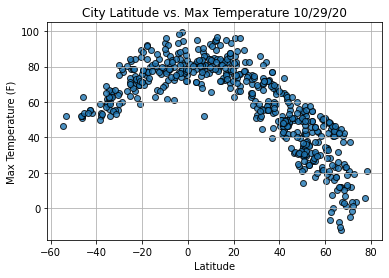

In [80]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

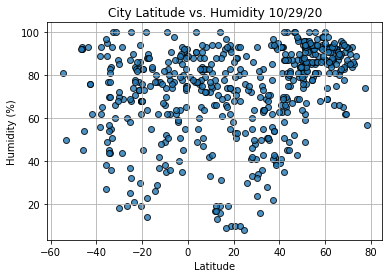

In [81]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

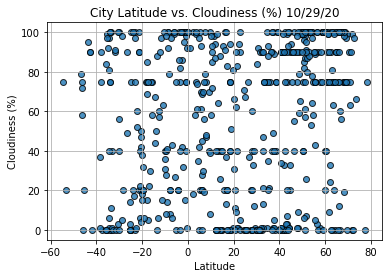

In [82]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

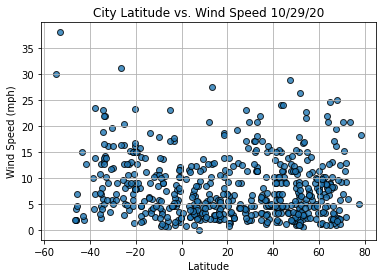

In [83]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [84]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress


In [85]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [86]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [87]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]


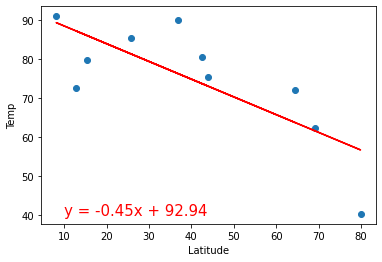

In [88]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [90]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [91]:
# To create a new DataFrame from a current DataFrame, 
# we can use the loc method on the current DataFrame
index13 = city_data_df.loc[13]
index13

City                        Airai
Country                        TL
Date          2020-10-29 16:20:13
Lat                         -8.93
Lng                        125.41
Max Temp                    61.57
Humidity                      100
Cloudiness                     14
Wind Speed                   0.89
Name: 13, dtype: object

In [92]:
# Filter a DataFrame based on a value of a row.
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4      False
       ...  
540     True
541     True
542     True
543     True
544    False
Name: Lat, Length: 545, dtype: bool

In [93]:
# Return a DataFrame with all data fitting the criteria, 
# for latitudes greater than or equal to 0, we can use the 
# loc method 
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Odweyne,SO,2020-10-29 16:25:09,9.41,45.06,76.59,42,70,11.83
2,Albany,US,2020-10-29 16:21:26,42.60,-73.97,46.00,90,100,1.57
8,Narsaq,GL,2020-10-29 16:20:30,60.92,-46.05,33.80,69,75,1.12
10,Galveston,US,2020-10-29 16:25:10,29.37,-94.97,60.80,48,1,20.80
11,Sept-Iles,CA,2020-10-29 16:21:43,50.20,-66.38,35.01,74,40,11.41


In [94]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

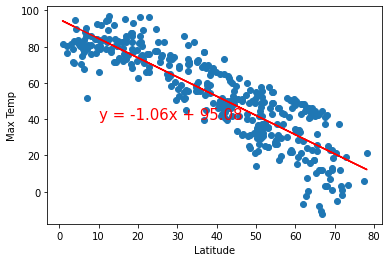

In [95]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

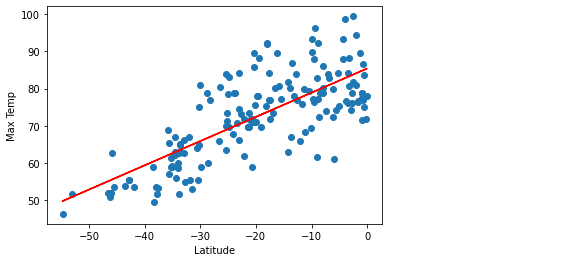

In [96]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

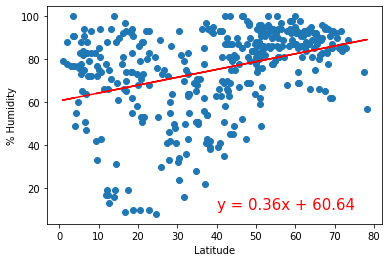

In [98]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

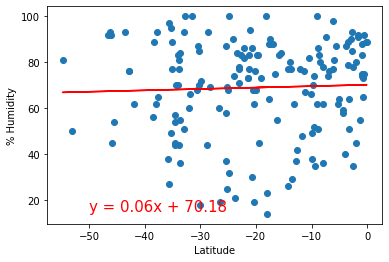

In [100]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

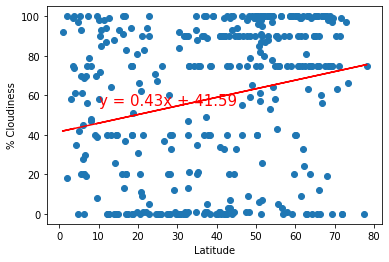

In [102]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,55))

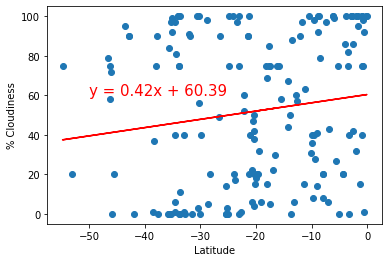

In [103]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

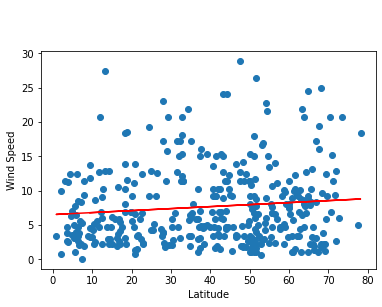

In [105]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

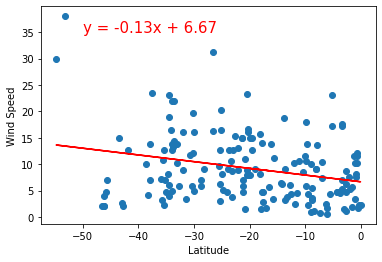

In [106]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))